In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
d=pd.read_csv("Wine.csv")

In [36]:
d.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [37]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [42]:
d['Customer_Segment'].unique()

array([1, 2, 3], dtype=int64)

In [43]:
x=d.iloc[:,:13]
y=d.iloc[:,13]

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x['Proline']=sc.fit_transform(x)

In [45]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=2)

In [46]:
from sklearn.decomposition import PCA
p=PCA(n_components=2)
x_train=p.fit_transform(x_train)
x_test=p.transform(x_test)
evr=p.explained_variance_ratio_#best variance
evr

array([0.91372003, 0.0475503 ])

In [47]:
x_train,x_test

(array([[ 4.03897697e+00,  7.10903249e-01],
        [-3.08121362e+00,  3.96808452e-01],
        [-2.91806269e+01,  3.12982627e+00],
        [-1.90738201e+01,  6.24701596e-01],
        [-9.83230360e+00, -1.71089308e-01],
        [ 1.30596035e+01, -2.12631330e-01],
        [ 1.85787181e+00,  3.45069192e+00],
        [ 3.39122763e+00, -7.95513620e+00],
        [ 6.99806942e+00, -5.03877882e-01],
        [-1.21227838e+01, -6.50675974e-01],
        [-1.91459882e+01,  2.19623305e+00],
        [ 8.10687985e+00, -2.60412488e+00],
        [ 2.39925365e+01,  5.17029583e+00],
        [-2.07870193e+01, -5.53493044e+00],
        [-1.30803558e+01,  1.67595255e+00],
        [-7.29167226e+00,  8.68596694e+00],
        [-5.07884059e+00,  2.00689227e-01],
        [-2.81277089e-02, -1.67778784e+00],
        [-1.10139752e+01, -1.88641948e+00],
        [ 4.97272505e+00,  8.44109980e-01],
        [-9.79399020e+00,  2.46932449e+00],
        [ 3.15985062e+00, -2.93527203e+00],
        [-1.30752883e+01,  4.493

In [48]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [49]:
h=lr.predict(x_test)
h,y_test

(array([1, 2, 3, 3, 2, 1, 2, 2, 2, 2, 1, 1, 1, 3, 3, 3, 1, 2, 1, 3, 1, 1,
        2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2], dtype=int64),
 12     1
 23     1
 166    3
 25     1
 35     1
 13     1
 65     2
 171    3
 112    2
 48     1
 78     2
 3      1
 6      1
 158    3
 149    3
 122    2
 42     1
 2      1
 29     1
 157    3
 130    3
 45     1
 106    2
 94     2
 5      1
 53     1
 93     2
 41     1
 54     1
 24     1
 133    3
 64     2
 151    3
 153    3
 28     1
 113    2
 Name: Customer_Segment, dtype: int64)

In [50]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,h)

In [51]:
cm

array([[10,  7,  1],
       [ 1,  7,  1],
       [ 1,  3,  5]], dtype=int64)

In [52]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x_set,y_set

(array([[-9.80658278e+00, -4.14675076e+00],
        [-3.95598218e+00, -2.04209487e+00],
        [ 1.20947105e+01,  3.92169145e+00],
        [ 2.48376534e+01,  5.86450975e+00],
        [ 1.05053869e+00,  5.71300387e-01],
        [-7.63726800e+00, -8.90348346e+00],
        [-9.60472196e-01, -1.58498802e+00],
        [-1.28537579e+01, -1.73407649e-01],
        [ 3.90430703e+00,  8.15414975e-01],
        [ 4.14850936e+00, -1.06231327e+00],
        [ 3.70087626e+01, -3.63292686e+00],
        [ 1.42689764e+01, -2.94080591e+00],
        [-2.76849335e+00, -5.41343090e+00],
        [-7.78744806e-01,  4.97341835e+00],
        [ 1.40668349e+01,  2.58870450e+00],
        [ 2.72871985e+00,  7.11729893e+00],
        [ 2.22141592e+00, -4.92606237e+00],
        [ 2.11226974e+00, -1.18280209e+00],
        [-2.83677085e+00, -3.99802332e+00],
        [-2.12974103e+00,  7.57035196e+00],
        [ 2.29606281e+01, -7.53857043e-01],
        [ 1.20867170e+01, -5.15284920e-01],
        [-1.90232118e+01, -1.095

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


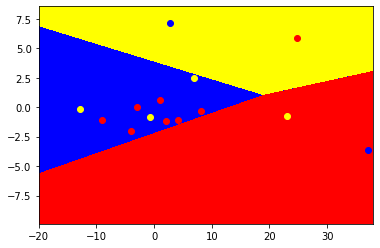

In [58]:
tx1=np.arange(x_set[:,0].min()-1,x_set[:,0].max()+1,0.01)
tx2=np.arange(x_set[:,1].min()-1,x_set[:,1].max()+1,0.01)
x1,x2=np.meshgrid(tx1,tx2)
ht=lr.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape)
plt.contourf(x1,x2,ht,cmap=ListedColormap(("red","blue","yellow")))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(("red","blue","yellow"))(i))

In [59]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x_set,y_set

(array([[ 4.03897697e+00,  7.10903249e-01],
        [-3.08121362e+00,  3.96808452e-01],
        [-2.91806269e+01,  3.12982627e+00],
        [-1.90738201e+01,  6.24701596e-01],
        [-9.83230360e+00, -1.71089308e-01],
        [ 1.30596035e+01, -2.12631330e-01],
        [ 1.85787181e+00,  3.45069192e+00],
        [ 3.39122763e+00, -7.95513620e+00],
        [ 6.99806942e+00, -5.03877882e-01],
        [-1.21227838e+01, -6.50675974e-01],
        [-1.91459882e+01,  2.19623305e+00],
        [ 8.10687985e+00, -2.60412488e+00],
        [ 2.39925365e+01,  5.17029583e+00],
        [-2.07870193e+01, -5.53493044e+00],
        [-1.30803558e+01,  1.67595255e+00],
        [-7.29167226e+00,  8.68596694e+00],
        [-5.07884059e+00,  2.00689227e-01],
        [-2.81277089e-02, -1.67778784e+00],
        [-1.10139752e+01, -1.88641948e+00],
        [ 4.97272505e+00,  8.44109980e-01],
        [-9.79399020e+00,  2.46932449e+00],
        [ 3.15985062e+00, -2.93527203e+00],
        [-1.30752883e+01,  4.493

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


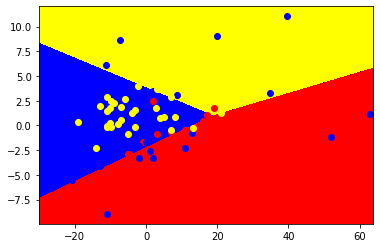

In [60]:
tx1=np.arange(x_set[:,0].min()-1,x_set[:,0].max()+1,0.01)
tx2=np.arange(x_set[:,1].min()-1,x_set[:,1].max()+1,0.01)
x1,x2=np.meshgrid(tx1,tx2)
ht=lr.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape)
plt.contourf(x1,x2,ht,cmap=ListedColormap(("red","blue","yellow")))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(("red","blue","yellow"))(i))

In [14]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=2)

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

c:\users\runnu\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [16]:
h=lr.predict(x_test)
h,y_test

(array([1, 2, 3, 2, 1, 1, 2, 3, 2, 1, 2, 1, 1, 3, 3, 2, 1, 1, 1, 3, 2, 1,
        2, 2, 1, 1, 2, 1, 1, 2, 3, 2, 3, 3, 1, 2], dtype=int64),
 12     1
 23     1
 166    3
 25     1
 35     1
 13     1
 65     2
 171    3
 112    2
 48     1
 78     2
 3      1
 6      1
 158    3
 149    3
 122    2
 42     1
 2      1
 29     1
 157    3
 130    3
 45     1
 106    2
 94     2
 5      1
 53     1
 93     2
 41     1
 54     1
 24     1
 133    3
 64     2
 151    3
 153    3
 28     1
 113    2
 Name: Customer_Segment, dtype: int64)

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,h)
cm

array([[15,  3,  0],
       [ 0,  9,  0],
       [ 0,  1,  8]], dtype=int64)